In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt("full_gas.dat", dtype=str)
Header = (data[0,:]).tolist()
solTchem = (data[1:,:]).astype(float)

In [3]:
file_name ='CAMP/out'
data = np.genfromtxt(file_name+"/cb05cl_ae5_camp_results.txt", dtype=str)
campHeader = (data[0,:]).tolist()
campsol = (data[1:,:]).astype(float)

In [4]:
campNames={'t':'time'}

for i,var in enumerate(Header[6:]):
    campNames.update({var:var})

In [5]:
print('Checking initial conditions; only print where there are differences')
for i,var in enumerate(campNames):
    camp_idx=campHeader.index(campNames[var])
    tchem_idx=Header.index(var)
    diff= campsol[0,camp_idx] - solTchem[0,tchem_idx]
    if abs(diff) > 0:
        print(var, 'camp :',campsol[0,camp_idx],'TChem :', solTchem[0,tchem_idx])

Checking initial conditions; only print where there are differences
t camp : 0.100000001 TChem : 0.0
BENZRO2 camp : 1e-30 TChem : 0.0
BNZHRXN camp : 1e-30 TChem : 0.0
BNZNRXN camp : 1e-30 TChem : 0.0
C2O3 camp : 1e-30 TChem : 0.0
CL camp : 1e-30 TChem : 0.0
CLO camp : 1e-30 TChem : 0.0
CRO camp : 1e-30 TChem : 0.0
CXO3 camp : 1e-30 TChem : 0.0
FMCL camp : 1e-30 TChem : 0.0
HCL camp : 1e-30 TChem : 0.0
HCO3 camp : 1e-30 TChem : 0.0
HOCL camp : 1e-30 TChem : 0.0
ISOPRXN camp : 1e-30 TChem : 0.0
ISPD camp : 1e-30 TChem : 0.0
MEO2 camp : 1e-30 TChem : 0.0
MEPX camp : 1e-30 TChem : 0.0
MGLY camp : 1e-30 TChem : 0.0
N2O5 camp : 1e-30 TChem : 0.0
NO3 camp : 1e-30 TChem : 0.0
NTR camp : 1e-30 TChem : 0.0
O camp : 1e-30 TChem : 0.0
O1D camp : 1e-30 TChem : 0.0
OPEN camp : 1e-30 TChem : 0.0
PACD camp : 1e-30 TChem : 0.0
PAN camp : 1e-30 TChem : 0.0
PANX camp : 1e-30 TChem : 0.0
PNA camp : 1e-30 TChem : 0.0
ROOH camp : 1e-30 TChem : 0.0
ROR camp : 1e-30 TChem : 0.0
SESQRXN camp : 1e-30 TChem : 0.

/var/folders/np/m42416h166j90krvxmfl40940000gp/T/ipykernel_33047/3967792245.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


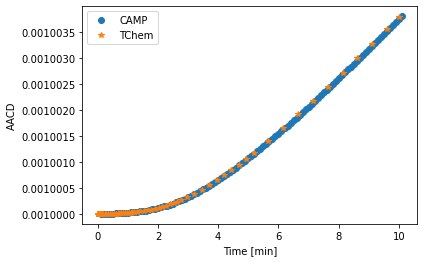

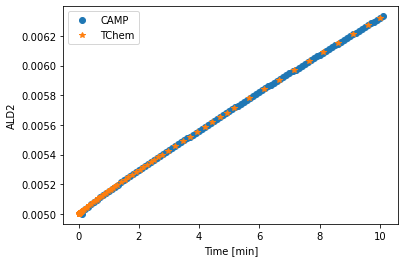

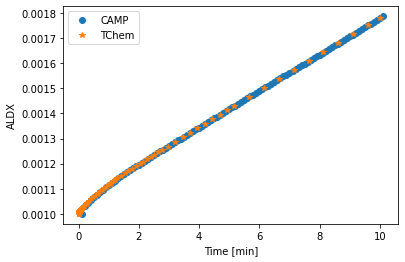

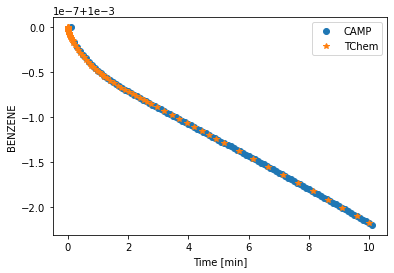

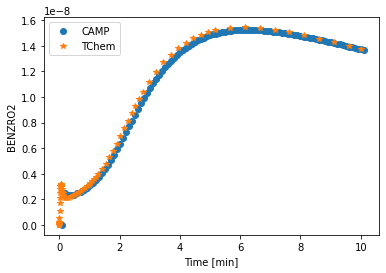

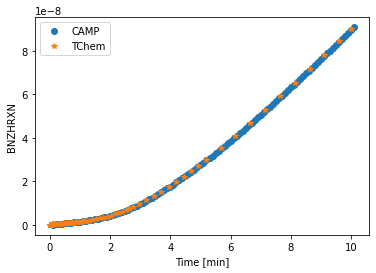

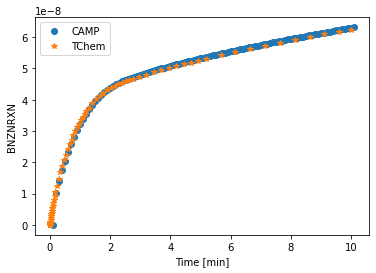

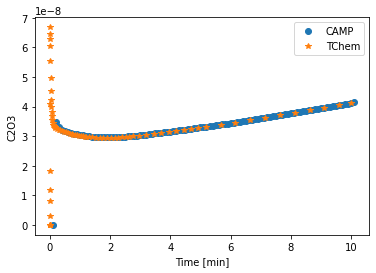

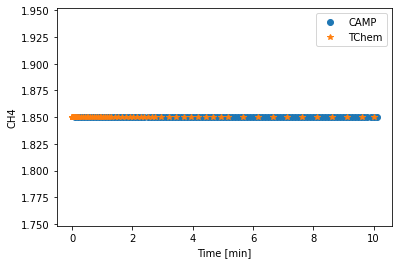

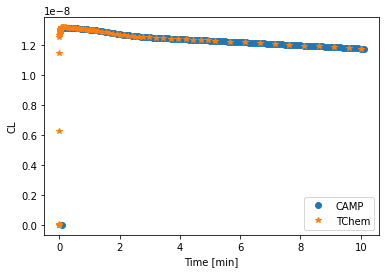

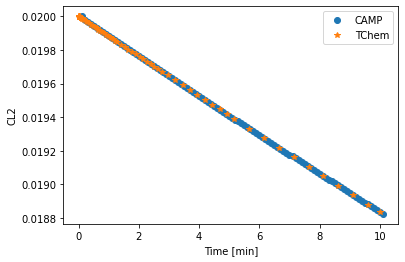

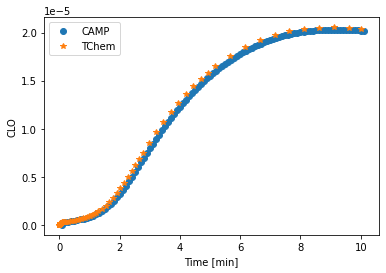

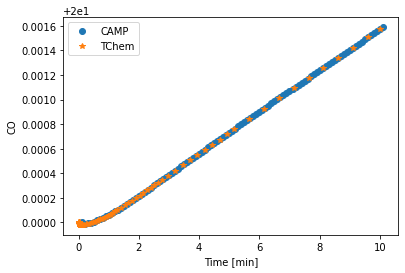

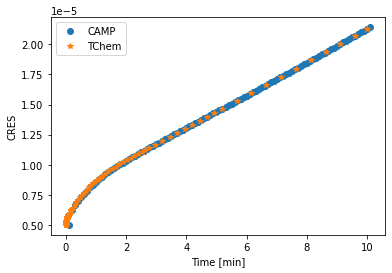

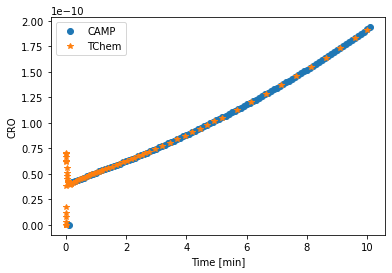

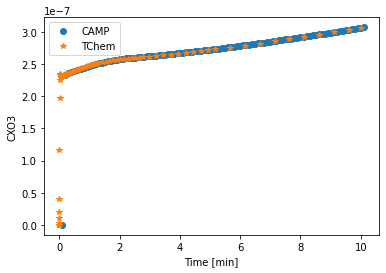

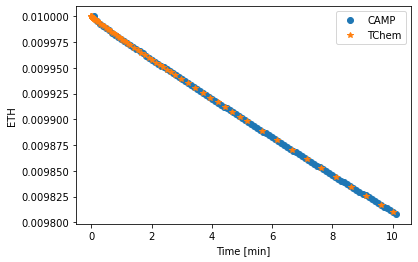

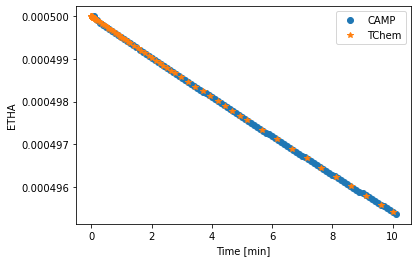

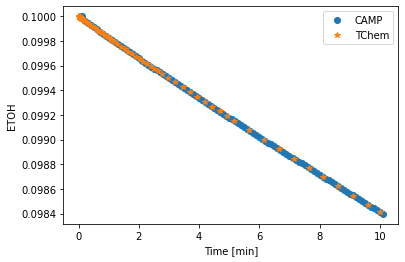

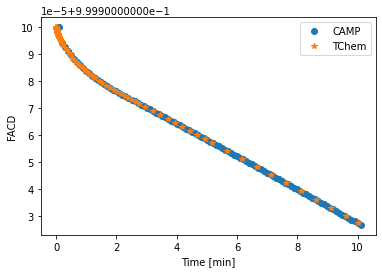

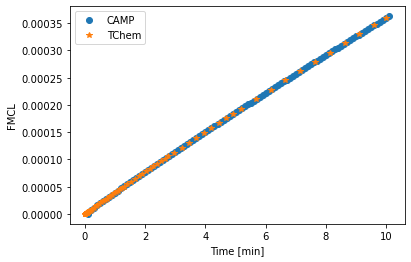

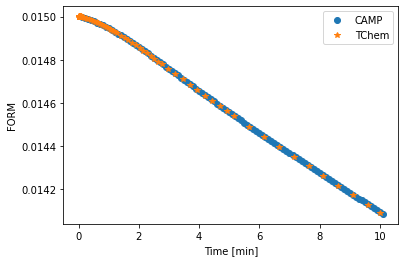

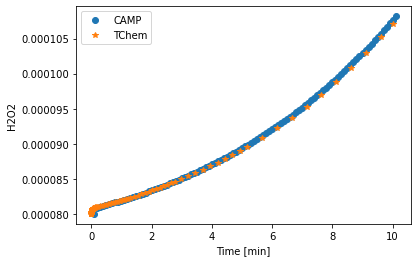

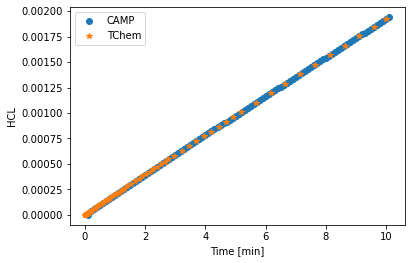

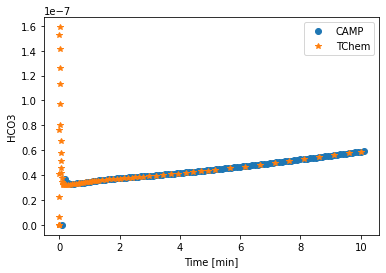

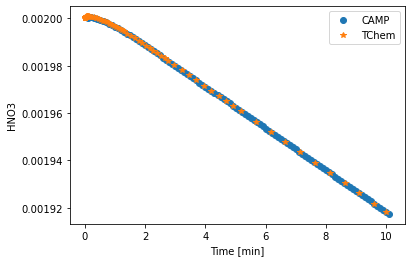

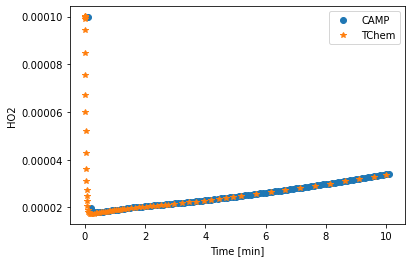

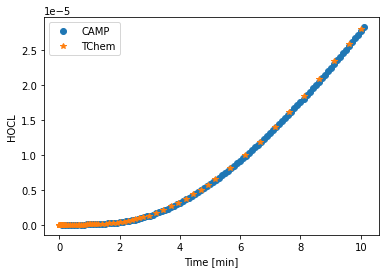

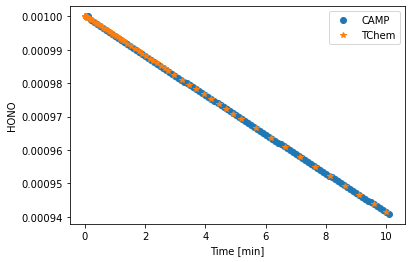

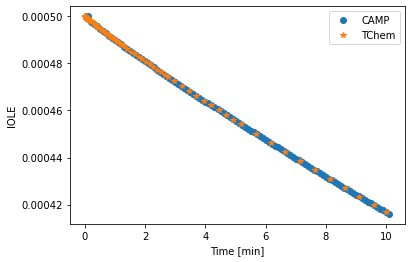

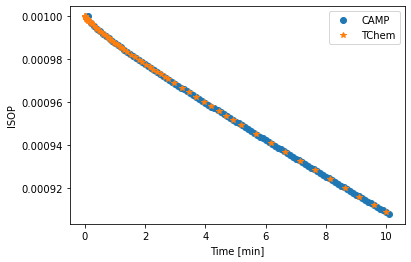

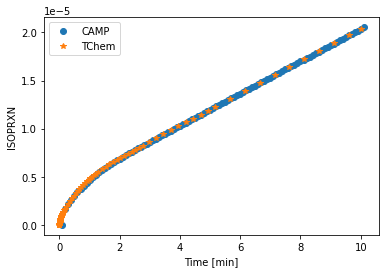

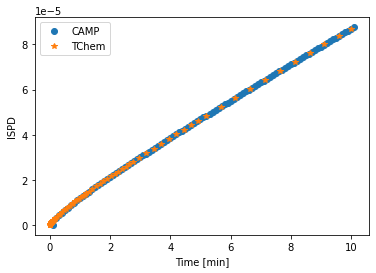

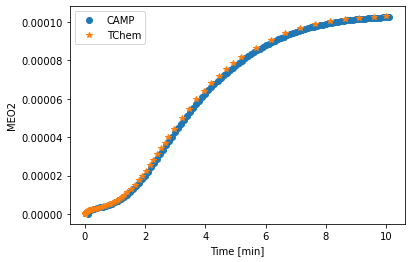

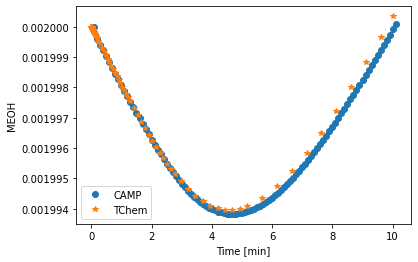

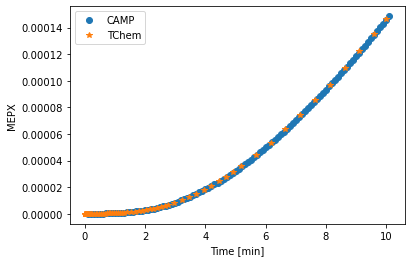

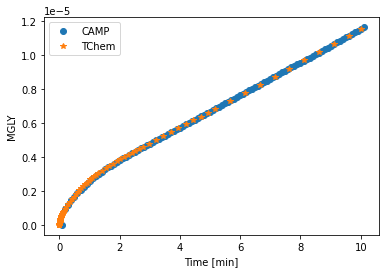

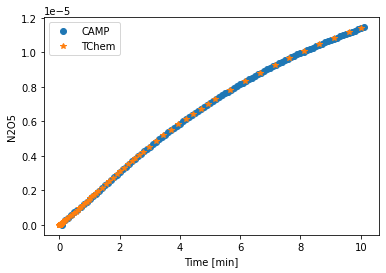

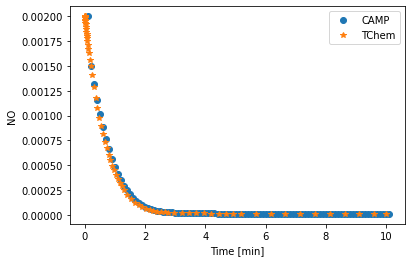

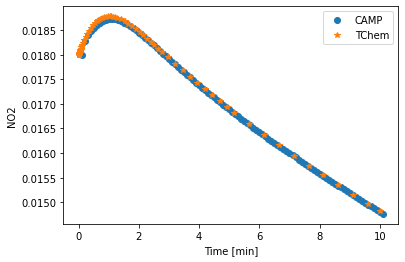

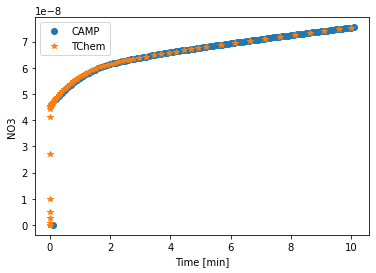

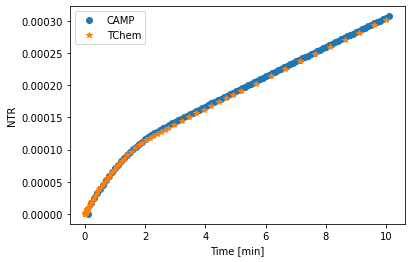

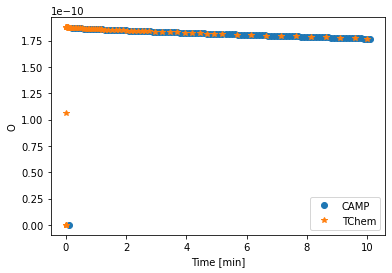

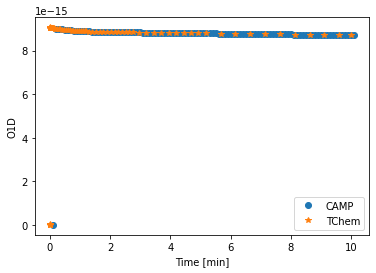

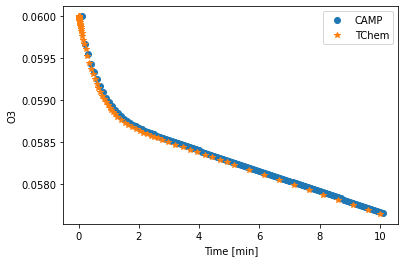

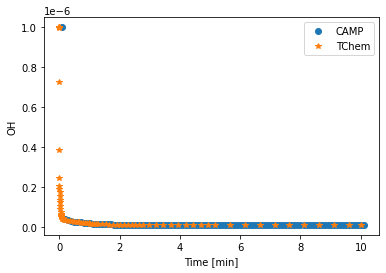

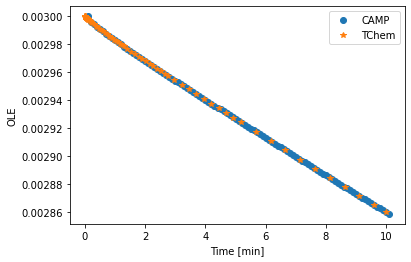

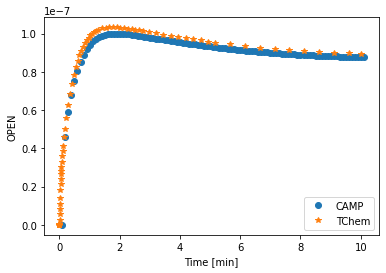

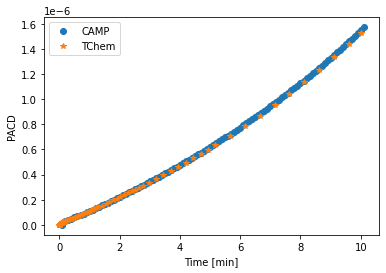

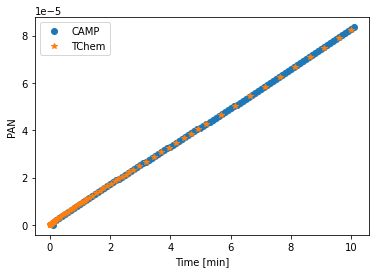

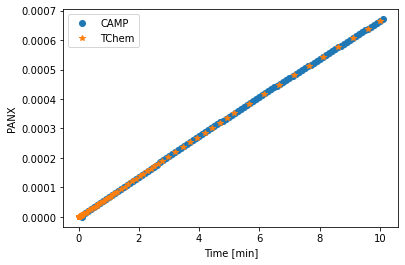

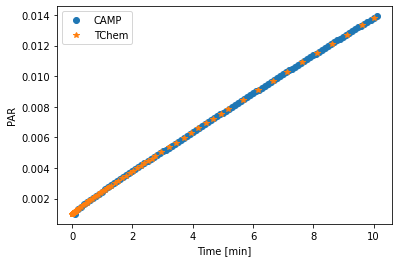

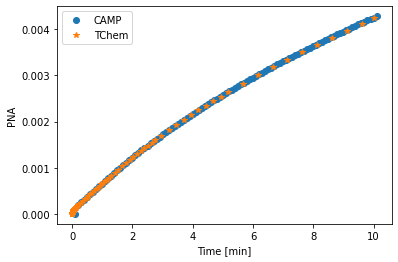

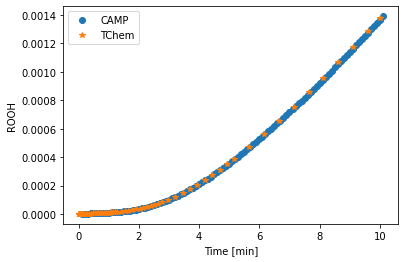

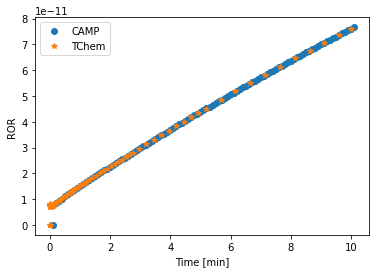

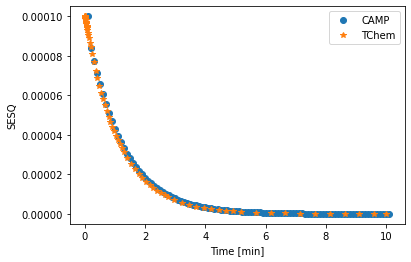

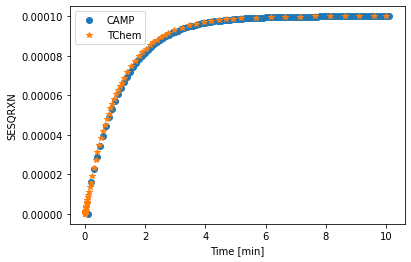

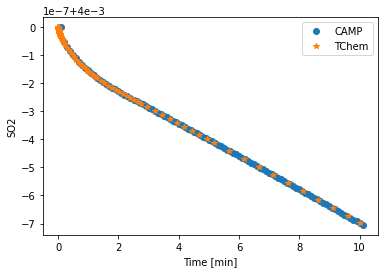

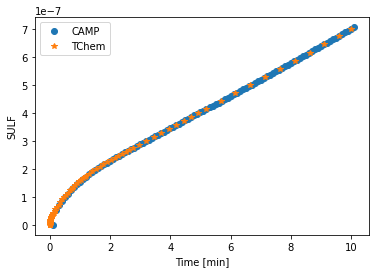

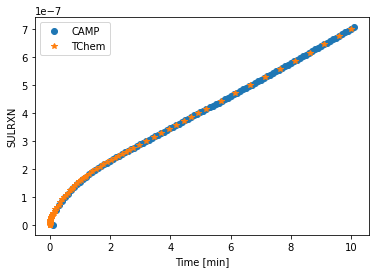

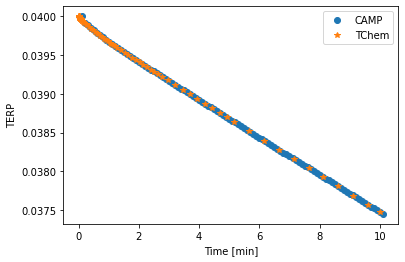

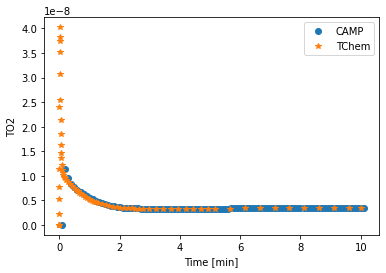

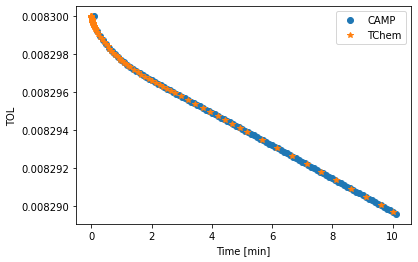

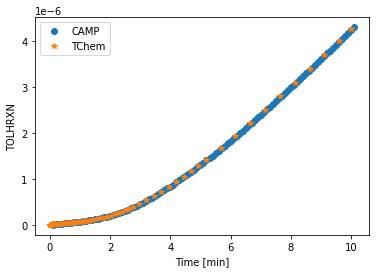

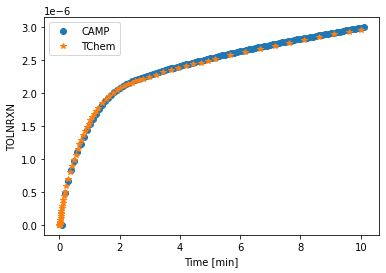

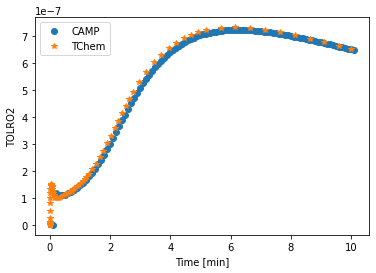

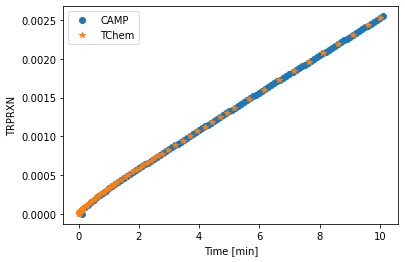

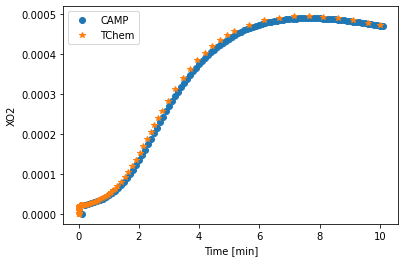

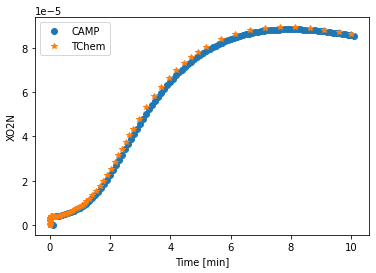

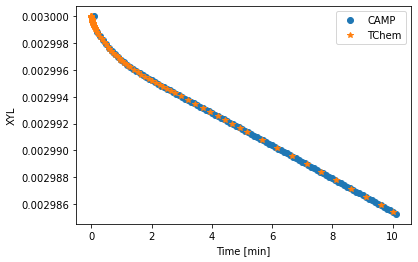

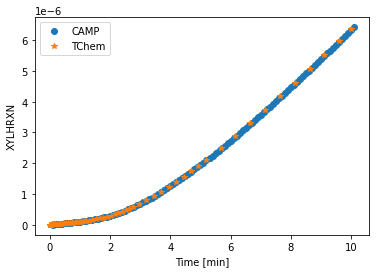

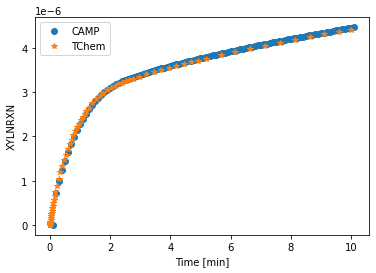

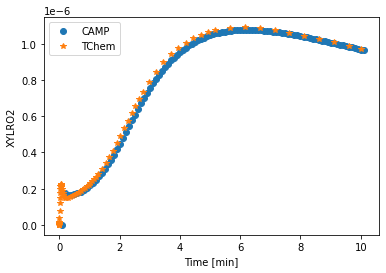

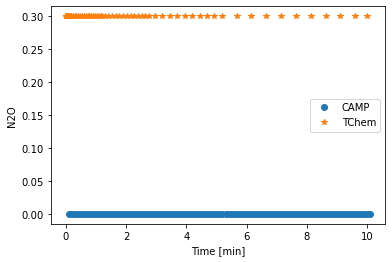

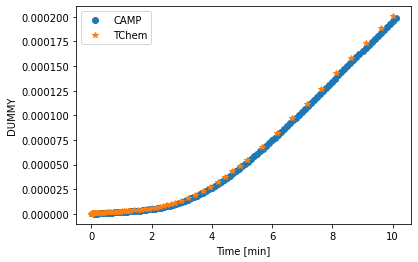

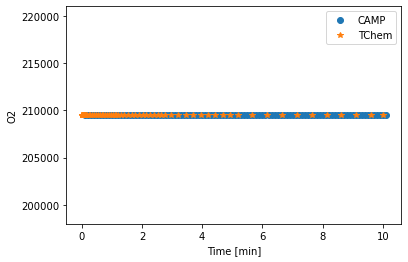

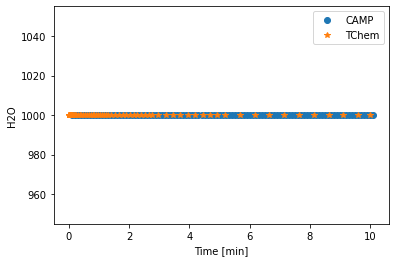

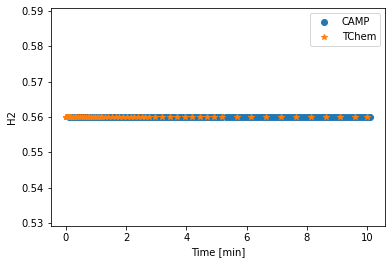

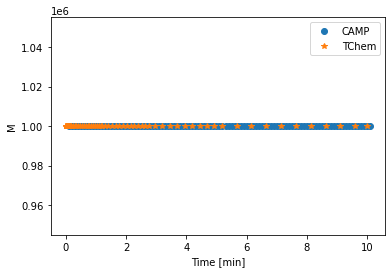

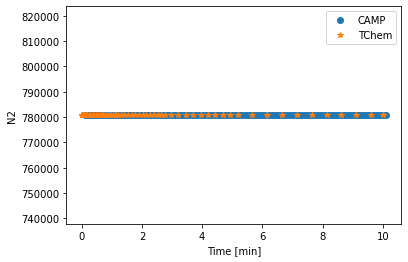

In [6]:
# ['NO2','NO','O','O2','O3']
for i,var in enumerate(campHeader[1:]):
    camp_idx=campHeader.index(campNames[var])
    tchem_idx=Header.index(var)
#     print(var,camp_idx,tchem_idx  )
    plt.figure()
    plt.plot(campsol[:,campHeader.index('time')], campsol[:,camp_idx],'o',label='CAMP')
    plt.plot(solTchem[:,Header.index('t')]/60, solTchem[:,tchem_idx], '*',label='TChem')
    plt.xlabel('Time [min]')
    plt.ylabel(var)
    plt.legend(loc='best')
    